In [ ]:
import tensorflow as tf

In [ ]:
import os
gpu_available = tf.test.is_gpu_available()

if gpu_available:
    # Get GPU details using system command
    command = "nvidia-smi --query-gpu=gpu_name --format=csv,noheader"
    gpu_model = os.popen(command).read().strip()

    if gpu_model:
        print("GPU Model:", gpu_model)
print('Okkaskgggffghgb')

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
GPU Model: NVIDIA GeForce RTX 3060 Ti
Okkaskgggffghgb


#loading data

In [ ]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 16092 files belonging to 3 classes.


#visualization

In [ ]:
data_iterator = data.as_numpy_iterator()

In [ ]:
batch = data_iterator.next()

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

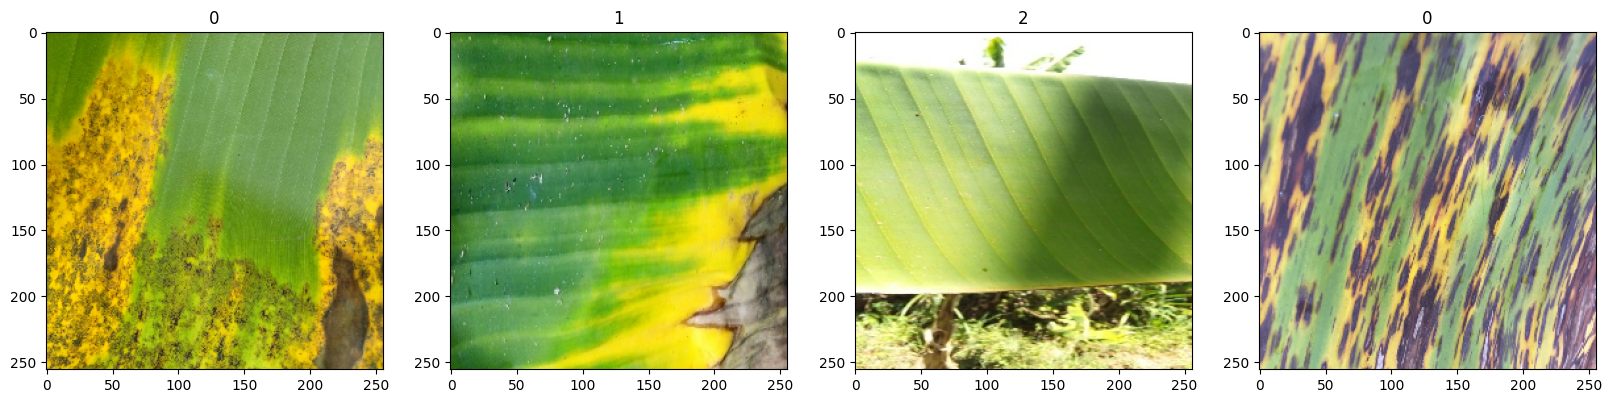

In [ ]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

#scaling between 0 and 1

In [4]:
data = data.map(lambda x,y: (x/255, y))

#splitting

In [5]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [6]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

#dependencies

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam

#model customization

In [ ]:
model = Sequential()

In [ ]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(3, activation='softmax'))

In [ ]:
model.compile('adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
logdir='logs'

In [ ]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

#Training

In [ ]:
hist = model.fit(train, epochs=50, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/50
352/352 [==============================] - 34s 81ms/step - loss: 0.5598 - accuracy: 0.7663 - val_loss: 0.3304 - val_accuracy: 0.8809
Epoch 2/50
352/352 [==============================] - 29s 81ms/step - loss: 0.2920 - accuracy: 0.8942 - val_loss: 0.2471 - val_accuracy: 0.9053
Epoch 3/50
352/352 [==============================] - 29s 81ms/step - loss: 0.2173 - accuracy: 0.9219 - val_loss: 0.1983 - val_accuracy: 0.9231
Epoch 4/50
352/352 [==============================] - 28s 79ms/step - loss: 0.1669 - accuracy: 0.9433 - val_loss: 0.2320 - val_accuracy: 0.9169
Epoch 5/50
352/352 [==============================] - 29s 81ms/step - loss: 0.1303 - accuracy: 0.9557 - val_loss: 0.1921 - val_accuracy: 0.9369
Epoch 6/50
352/352 [==============================] - 28s 79ms/step - loss: 0.0920 - accuracy: 0.9711 - val_loss: 0.1715 - val_accuracy: 0.9413
Epoch 7/50
352/352 [==============================] - 28s 79ms/step - loss: 0.0676 - accuracy: 0.9784 - val_loss: 0.2107 - val_accuracy:

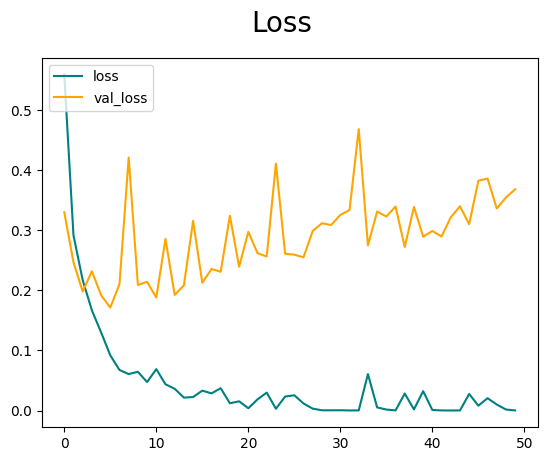

In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

#testing

In [ ]:
from tensorflow.keras.metrics import SparseCategoricalAccuracy
sparse_accuracy = SparseCategoricalAccuracy()
for bat in test.as_numpy_iterator():
    X, y = bat
    yhat = model.predict(X)
    sparse_accuracy.update_state(y, yhat)
print("Test Accuracy: ", sparse_accuracy.result())

1/1 [==============================] - 0s 25ms/step
Test Accuracy:  tf.Tensor(0.951875, shape=(), dtype=float32)


In [ ]:
import os
from tensorflow.keras.models import load_model

#Evaluation

In [ ]:
model_path = os.path.join('models', 'custom.h5')


model = load_model(model_path)

In [ ]:
from sklearn.metrics import classification_report
import numpy as np

# Assuming 'test' is a TensorFlow dataset
# Replace 'your_model' with your actual trained model


# Initialize empty arrays to store predictions and true labels
all_y_pred = np.array([], dtype=int)
all_true_labels = np.array([], dtype=int)

# Iterate through test batches
for batch in test.as_numpy_iterator():
    # Assuming 'model' is your trained model
    Y_pred_batch = model.predict(batch[0])  # assuming batch[0] contains input data
    y_pred_batch = np.argmax(Y_pred_batch, axis=1)

    # Concatenate batch predictions and true labels to the overall arrays
    all_y_pred = np.concatenate([all_y_pred, y_pred_batch])
    all_true_labels = np.concatenate([all_true_labels, batch[1]])  # assuming batch[1] contains true labels

# After processing all test batches, print the classification report
print(classification_report(all_true_labels, all_y_pred))


1/1 [==============================] - 0s 90ms/step
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       549
           1       0.99      0.98      0.98       506
           2       0.99      1.00      0.99       545

    accuracy                           0.99      1600
   macro avg       0.99      0.99      0.99      1600
weighted avg       0.99      0.99      0.99      1600



In [ ]:
!pip uninstall scikit-learn


In [ ]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip show seaborn

Name: seaborn
Version: 0.13.0
Summary: Statistical data visualization
Home-page: 
Author: 
Author-email: Michael Waskom <mwaskom@gmail.com>
License: 
Location: c:\users\asgor\anaconda3\envs\banana\lib\site-packages
Requires: matplotlib, numpy, pandas
Required-by: 
Note: you may need to restart the kernel to use updated packages.


#confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'all_true_labels' and 'all_y_pred' are already defined

# Compute confusion matrix
cm = confusion_matrix(all_true_labels, all_y_pred)

# Plot confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1', 'Class 2'], yticklabels=['Class 0', 'Class 1', 'Class 2'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()